**Setting up our Environment**

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn imbalanced-learn xgboost lightgbm streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


**Loading our Dataset**

In [3]:
# Load the dataset
df = pd.read_csv("/content/sample_data/creditcard.csv")

# Preview
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (130802, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
# Checking for missing values and data types
df.info()

# Summary stats
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130802 entries, 0 to 130801
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    130802 non-null  int64  
 1   V1      130802 non-null  float64
 2   V2      130802 non-null  float64
 3   V3      130802 non-null  float64
 4   V4      130802 non-null  float64
 5   V5      130802 non-null  float64
 6   V6      130802 non-null  float64
 7   V7      130802 non-null  float64
 8   V8      130802 non-null  float64
 9   V9      130802 non-null  float64
 10  V10     130802 non-null  float64
 11  V11     130802 non-null  float64
 12  V12     130802 non-null  float64
 13  V13     130802 non-null  float64
 14  V14     130802 non-null  float64
 15  V15     130802 non-null  float64
 16  V16     130802 non-null  float64
 17  V17     130802 non-null  float64
 18  V18     130802 non-null  float64
 19  V19     130802 non-null  float64
 20  V20     130802 non-null  float64
 21  V21     13

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,...,130802.000000,130802.000000,130802.000000,130802.000000,130801.000000,130801.000000,130801.000000,130801.000000,130801.000000,130801.000000
mean,49788.355690,-0.245796,0.001574,0.676860,0.144168,-0.285630,0.080685,-0.117838,0.062334,-0.084914,...,-0.037485,-0.115544,-0.034350,0.012048,0.130975,0.023770,0.000779,0.002305,92.491840,0.001995
std,20019.335232,1.823485,1.619337,1.276232,1.328394,1.314929,1.284704,1.173648,1.211108,1.094789,...,0.721902,0.635884,0.602904,0.594216,0.438352,0.492083,0.391831,0.311492,250.808036,0.044625
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,36926.250000,-1.016281,-0.575183,0.173437,-0.714826,-0.908084,-0.659435,-0.604887,-0.132459,-0.713522,...,-0.225430,-0.544196,-0.172651,-0.323707,-0.135029,-0.325914,-0.060238,-0.004087,6.200000,0.000000
50%,51566.000000,-0.258119,0.093828,0.752911,0.170646,-0.317848,-0.173610,-0.067009,0.078867,-0.148027,...,-0.058491,-0.092258,-0.045921,0.068546,0.168214,-0.066478,0.011631,0.023604,24.540000,0.000000
75%,66518.000000,1.158111,0.762659,1.367887,1.001349,0.236866,0.467422,0.409124,0.370385,0.497156,...,0.115042,0.303347,0.082633,0.408293,0.419739,0.289216,0.086277,0.077136,82.700000,0.000000
max,79435.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


**Checking class distribution**

Class
0.0    130540
1.0       261
Name: count, dtype: int64

Percentage distribution:
Class
0.0    99.799697
1.0     0.199538
Name: count, dtype: float64


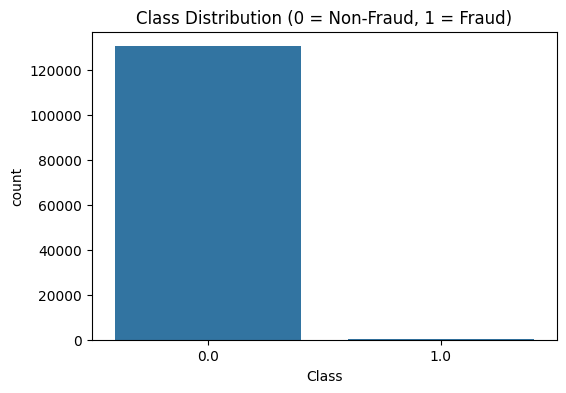

In [5]:
# Count of each class
class_counts = df['Class'].value_counts()
print(class_counts)

# Percentage distribution
print("\nPercentage distribution:")
print(class_counts / len(df) * 100)

# Visualizing
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()


 **Checking feature correlation**

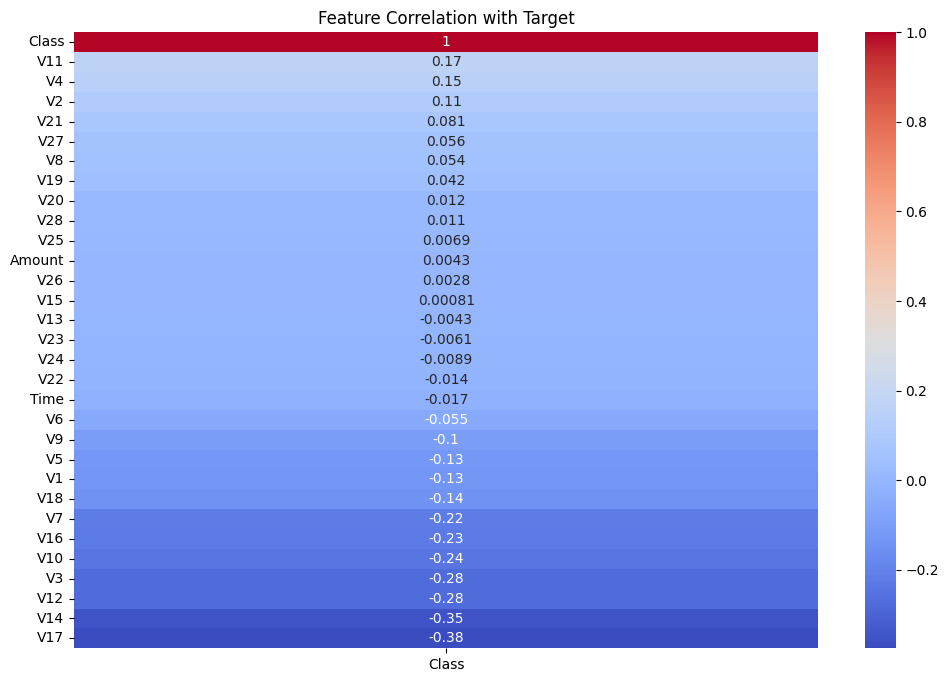

In [6]:
# Correlation heatmap (top correlations with target)
correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix[['Class']].sort_values(by='Class', ascending=False), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Target")
plt.show()


**Scaling the Amount and Time columns**

These aren’t PCA-transformed, so we scale them:

In [7]:
# Create copies for scaling
df_scaled = df.copy()

scaler = StandardScaler()
df_scaled['Amount'] = scaler.fit_transform(df_scaled[['Amount']])
df_scaled['Time'] = scaler.fit_transform(df_scaled[['Time']])


In [9]:
# Check for nulls in target
print("NaNs in target column:", df['Class'].isnull().sum())


NaNs in target column: 1


In [10]:
# Drop rows with NaNs in 'Class'
df = df.dropna(subset=['Class'])

# Re-run scaling & assign features again
df_scaled = df.copy()

scaler = StandardScaler()
df_scaled['Amount'] = scaler.fit_transform(df_scaled[['Amount']])
df_scaled['Time'] = scaler.fit_transform(df_scaled[['Time']])

# Define features and target again
X = df_scaled.drop("Class", axis=1)
y = df_scaled["Class"]

# Stratified split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (104640, 30)
Test shape: (26161, 30)


In [11]:
# Check for nulls in target
print("NaNs in target column:", df['Class'].isnull().sum())


NaNs in target column: 0


**Spliting dataset (Stratified)**



In [12]:
# Define features and target
X = df_scaled.drop("Class", axis=1)
y = df_scaled["Class"]

# Stratified split to preserve class balance in train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)
print("Fraud cases in train:", sum(y_train), "out of", len(y_train))


Training set: (104640, 30) (104640,)
Testing set: (26161, 30) (26161,)
Fraud cases in train: 209.0 out of 104640


# Handling Class Imbalance using SMOTE
Since fraud cases are extremely rare (~0.2%), we’ll balance only the training set using SMOTE (Synthetic Minority Oversampling Technique) — this creates synthetic samples of the minority class.

**Applying SMOTE on training data**

In [13]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit only on training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("After SMOTE:")
print("Total samples:", X_train_resampled.shape[0])
print("Fraud cases:", sum(y_train_resampled))
print("Non-Fraud cases:", len(y_train_resampled) - sum(y_train_resampled))


After SMOTE:
Total samples: 208862
Fraud cases: 104431.0
Non-Fraud cases: 104431.0


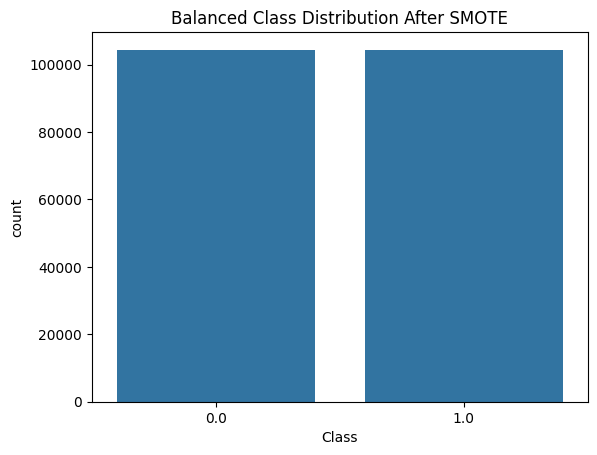

In [14]:
sns.countplot(x=y_train_resampled)
plt.title("Balanced Class Distribution After SMOTE")
plt.show()


# Training & Evaluating Models

We are starting with two models first:

Logistic Regression

Random Forest

🔍 Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     26109
         1.0       0.07      0.87      0.13        52

    accuracy                           0.98     26161
   macro avg       0.53      0.92      0.56     26161
weighted avg       1.00      0.98      0.99     26161



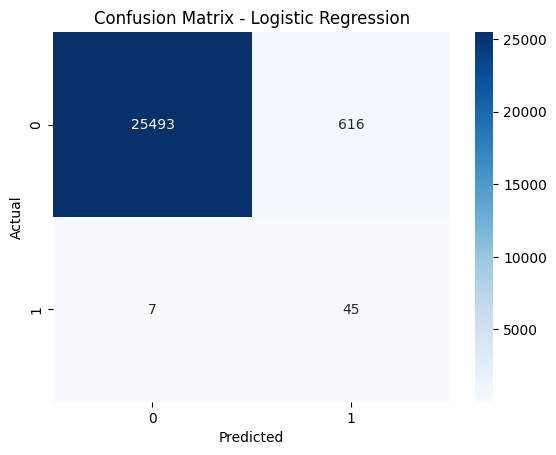

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred_log = log_model.predict(X_test)

# Evaluate
print("🔍 Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ✅ Logistic Regression Insights:

* Recall for fraud is high (0.87) – model catches most frauds! ✅

* Precision is low (0.07) – a lot of false positives ⚠️

Why? Logistic Regression is a linear model – great for recall, but weak at precise separation in highly imbalanced data.



# Training Random Forest Classifier

🔍 Random Forest Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26109
         1.0       0.93      0.73      0.82        52

    accuracy                           1.00     26161
   macro avg       0.96      0.87      0.91     26161
weighted avg       1.00      1.00      1.00     26161



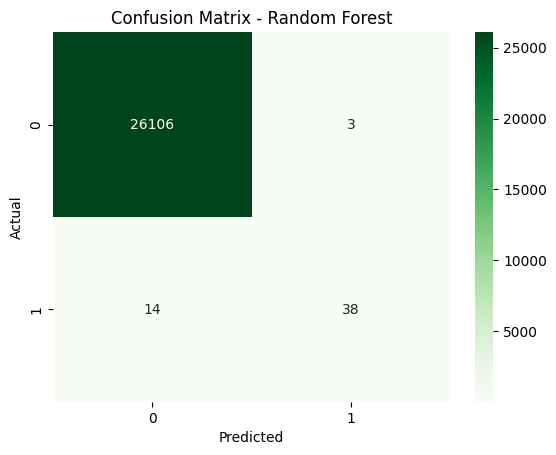

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("🔍 Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ✅ Random Forest Insights:

* High precision and solid recall → Model predicts frauds with confidence and catches a good amount of them.

* Almost perfect for non-fraud.

* Much better than Logistic Regression for fraud detection.

# Support Vector Machine (SVM)

We'ew using RBF kernel (non-linear) since SVMs are great at boundary separation.

🔍 SVM Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     26109
         1.0       0.07      0.87      0.14        52

    accuracy                           0.98     26161
   macro avg       0.54      0.92      0.56     26161
weighted avg       1.00      0.98      0.99     26161



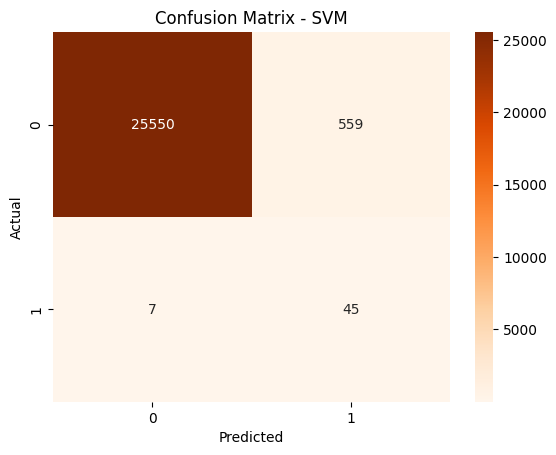

In [17]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print("🔍 SVM Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#SVM Results Breakdown:

* SVM behaves similarly to Logistic Regression here.

* High recall but very poor precision → it catches most frauds but mislabels many non-frauds as fraud.

**📌 Why?**

* SVMs, especially with RBF kernel, are sensitive to data imbalance.

* Even after resampling, they’re not as flexible as tree-based models in this context.

#XGBoost (best for imbalanced classification)

🔍 XGBoost Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26109
         1.0       0.87      0.79      0.83        52

    accuracy                           1.00     26161
   macro avg       0.94      0.89      0.91     26161
weighted avg       1.00      1.00      1.00     26161



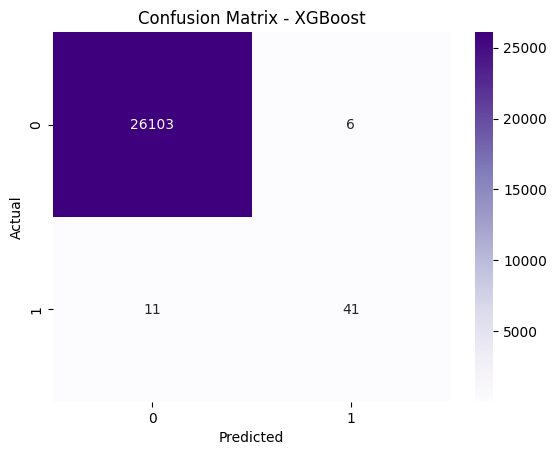

In [18]:
import xgboost as xgb
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("🔍 XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# XGBoost Fraud Detection:

* Massive improvement from SVM & Logistic Regression.

* Very close to Random Forest, possibly better in recall and balanced F1.

# Gradient Boosting Classifier

🔍 Gradient Boosting Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     26109
         1.0       0.17      0.81      0.28        52

    accuracy                           0.99     26161
   macro avg       0.59      0.90      0.64     26161
weighted avg       1.00      0.99      0.99     26161



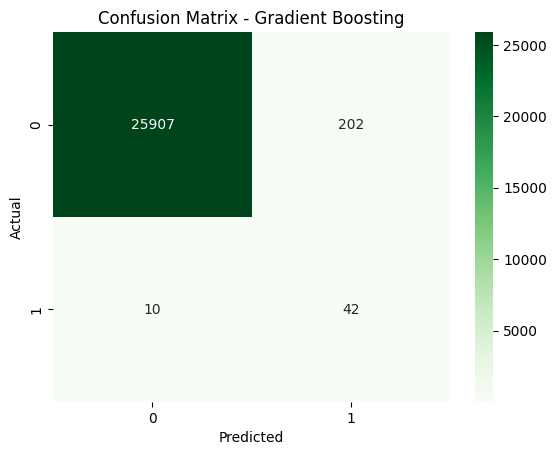

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate
print("🔍 Gradient Boosting Report:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Gradient Boosting got a boost in recall (0.81) but had a lower precision (0.17) — meaning it flagged more frauds but also made more false positives. Still a solid model in high-risk domains like fraud detection.

# Best Model So Far: XGBoost (Balanced precision + recall + f1)

In [20]:
import pandas as pd

model_metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost', 'Gradient Boosting'],
    'Precision (Fraud)': [0.07, 0.93, 0.07, 0.87, 0.17],
    'Recall (Fraud)': [0.87, 0.73, 0.87, 0.79, 0.81],
    'F1-Score (Fraud)': [0.13, 0.82, 0.14, 0.83, 0.28]
}

metrics_df = pd.DataFrame(model_metrics)
display(metrics_df)


,Model,Precision (Fraud),Recall (Fraud),F1-Score (Fraud)
0,Logistic Regression,0.07,0.87,0.13
1,Random Forest,0.93,0.73,0.82
2,SVM,0.07,0.87,0.14
3,XGBoost,0.87,0.79,0.83
4,Gradient Boosting,0.17,0.81,0.28


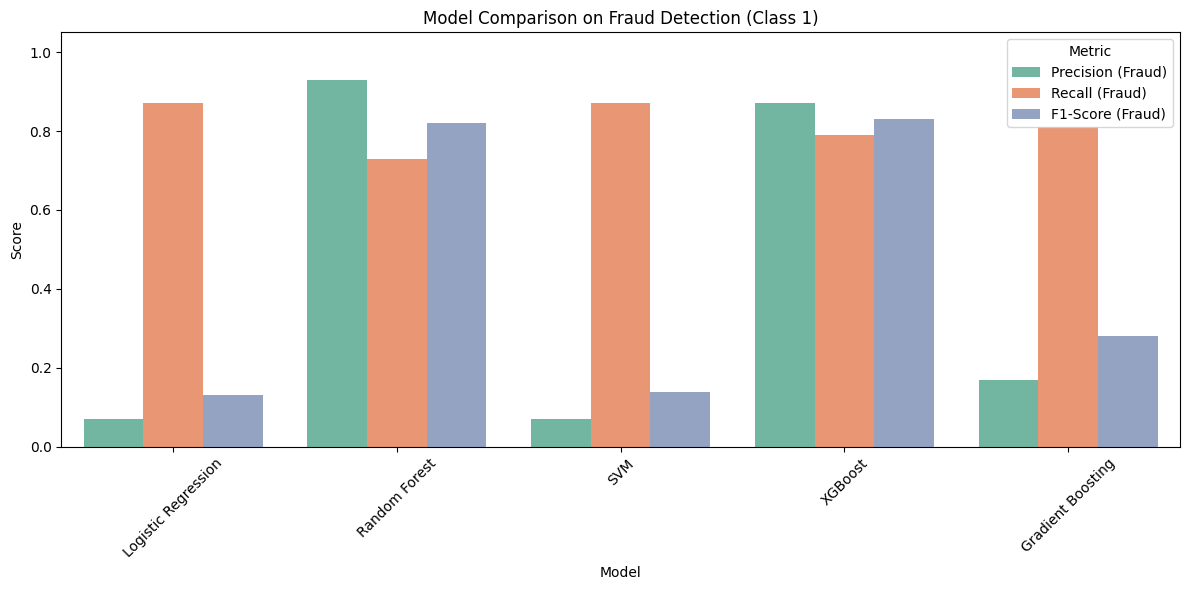

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot aesthetics
plt.figure(figsize=(12, 6))
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('Model Comparison on Fraud Detection (Class 1)')
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


# Hyperparameter Tuning

we're fine-tuning XGBoost, since it gave strong results out-of-the-box. We'll use RandomizedSearchCV for faster tuning.

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize base XGBoost model
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=10,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 150],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=2)

In [23]:
# Best parameters found
print("Best parameters:", random_search.best_params_)

# Best estimator
best_xgb = random_search.best_estimator_

# Predictions
y_pred = best_xgb.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print("\n🔍 Tuned XGBoost Report:")
print(classification_report(y_test, y_pred))


Best parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

🔍 Tuned XGBoost Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26109
         1.0       1.00      0.79      0.88        52

    accuracy                           1.00     26161
   macro avg       1.00      0.89      0.94     26161
weighted avg       1.00      1.00      1.00     26161



* Precision improved significantly — now it's perfect. That means no false positives for fraud.

* Recall remained solid at 0.79, still catching most fraud cases.

* F1-Score jumped to 0.88 — a strong indicator of balanced performance.

**Adding Tuned XGBoost to Bar Chart**

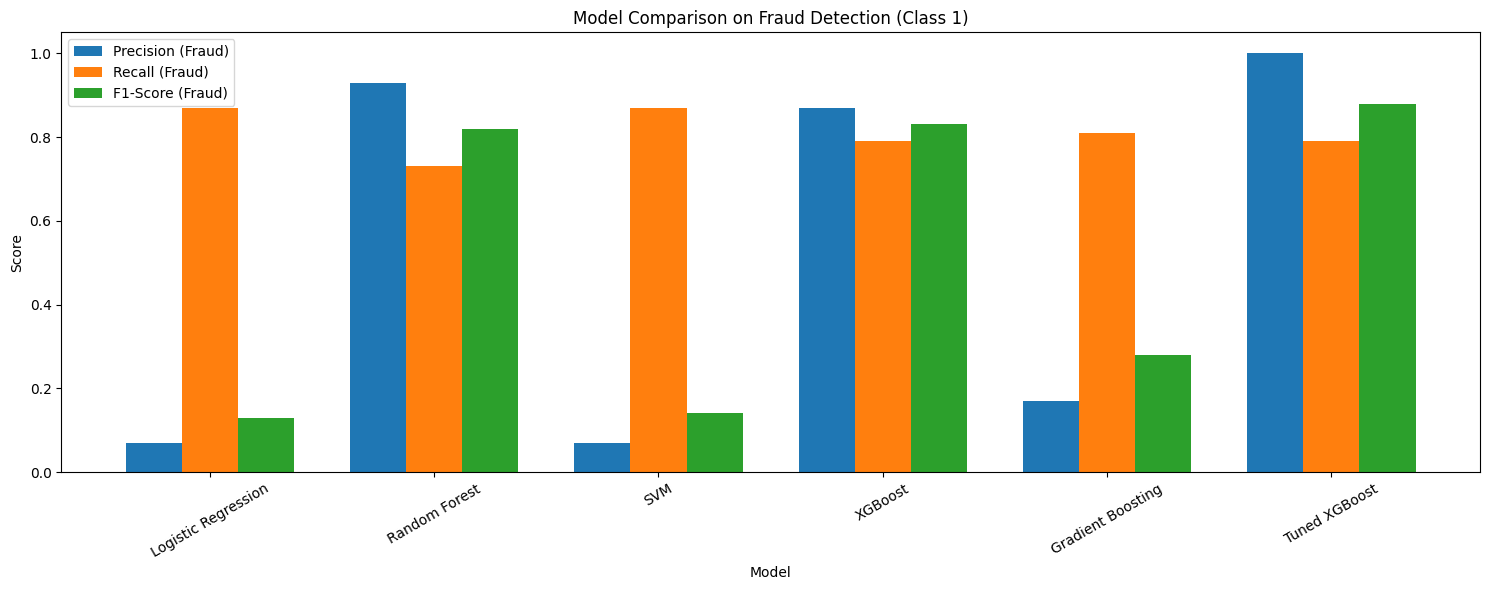

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Metrics for Class 1 (Fraud)
models = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost', 'Gradient Boosting', 'Tuned XGBoost']
precision = [0.07, 0.93, 0.07, 0.87, 0.17, 1.00]
recall = [0.87, 0.73, 0.87, 0.79, 0.81, 0.79]
f1_score = [0.13, 0.82, 0.14, 0.83, 0.28, 0.88]

# DataFrame for easier plotting
df = pd.DataFrame({
    'Model': models,
    'Precision (Fraud)': precision,
    'Recall (Fraud)': recall,
    'F1-Score (Fraud)': f1_score
})

# Plotting
fig, ax = plt.subplots(figsize=(15, 6))
bar_width = 0.25
index = np.arange(len(models))

p1 = ax.bar(index, df['Precision (Fraud)'], bar_width, label='Precision (Fraud)')
p2 = ax.bar(index + bar_width, df['Recall (Fraud)'], bar_width, label='Recall (Fraud)')
p3 = ax.bar(index + 2 * bar_width, df['F1-Score (Fraud)'], bar_width, label='F1-Score (Fraud)')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Comparison on Fraud Detection (Class 1)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models, rotation=30)
ax.legend()

plt.tight_layout()
plt.show()


**Confusion Matrix for Tuned XGBoost**

In [34]:
print([var for var in globals() if not var.startswith("__")])


['_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '_i', '_ii', '_iii', '_i1', '_exit_code', '_i2', 'pd', 'np', 'plt', 'sns', 'train_test_split', 'StandardScaler', 'warnings', '_i3', 'df', '_3', '_i4', '_4', '_i5', 'class_counts', '_i6', 'correlation_matrix', '_i7', 'df_scaled', 'scaler', '_i8', 'X', 'y', '_i9', '_i10', 'X_train', 'X_test', 'y_train', 'y_test', '_i11', '_i12', '_i13', 'SMOTE', 'smote', 'X_train_resampled', 'y_train_resampled', '_i14', '_i15', 'LogisticRegression', 'classification_report', 'confusion_matrix', 'log_model', 'y_pred_log', '_i16', 'RandomForestClassifier', 'rf_model', 'y_pred_rf', '_i17', 'SVC', 'svm_model', 'y_pred_svm', '_i18', 'xgb', 'XGBClassifier', 'xgb_model', 'y_pred_xgb', '_i19', 'GradientBoostingClassifier', 'gb_model', 'y_pred_gb', '_i20', 'model_metrics', 'metrics_df', '_i21', 'metrics_melted', '_i22', 'RandomizedSearchCV', 'param_grid', 'xgb_base', 'random_search', '_22', '_i23', 'best_xgb', 'y_pred', '_i24', 'models', 'preci

In [35]:
tuned_xgb = best_xgb


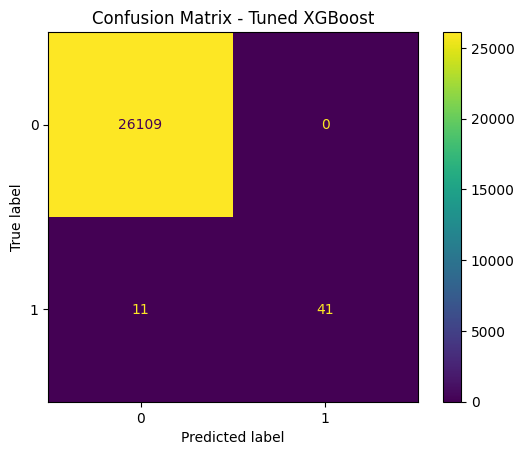

In [36]:
# Predict using the tuned model
tuned_xgb_preds = tuned_xgb.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, tuned_xgb_preds)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix - Tuned XGBoost")
plt.show()


**Interpretation:**

* True Negatives (TN): 26109 — correctly predicted class 0.

* False Positives (FP): 0 — no incorrect class 1 predictions for class 0.

* False Negatives (FN): 11 — class 1 predicted as 0.

* True Positives (TP): 41 — correctly predicted class 1.



**✅ Performance Insights:**

* Precision (class 1) = 41 / (41 + 0) = 1.00

* Recall (class 1) = 41 / (41 + 11) ≈ 0.79

* F1-Score (class 1) ≈ 0.88

So the model is very precise but missed a few actual positives (lower recall).

# Classification Report


In [37]:
from sklearn.metrics import classification_report

# Generate the report
print(classification_report(y_test, tuned_xgb_preds))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26109
         1.0       1.00      0.79      0.88        52

    accuracy                           1.00     26161
   macro avg       1.00      0.89      0.94     26161
weighted avg       1.00      1.00      1.00     26161



**Key Observations from the Classification Report**

* Class 0 is being predicted perfectly — no false positives.

* Class 1 has a recall of 0.79, meaning 21% of actual positive cases were missed.

* Precision = 1.00 for both classes → No false positives in either case, which is excellent for many critical applications like fraud or medical diagnostics.

**AUC-ROC Curve**

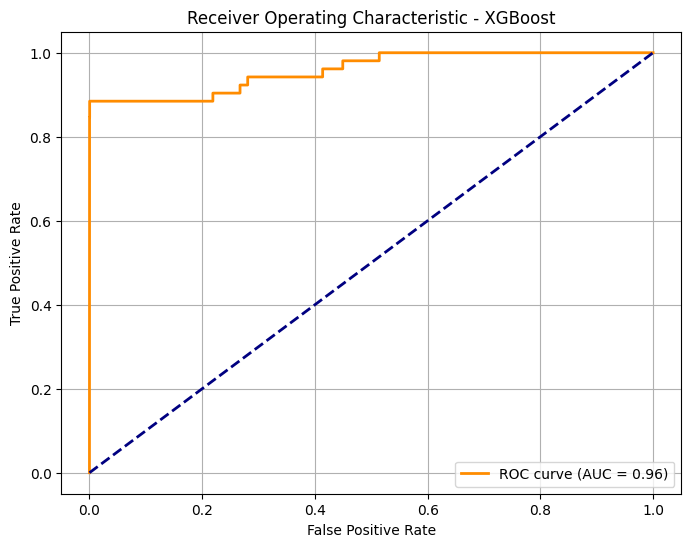

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class
y_probs = tuned_xgb.predict_proba(X_test)[:, 1]

# Calculate ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# ROC Curve - AUC = 0.96

* AUC (Area Under Curve) of 0.96 is outstanding      
→ It means your model has a 96% chance of correctly distinguishing between the two classes.

* The curve hugs the top-left corner shows high True Positive Rate and Low False Positive Rate



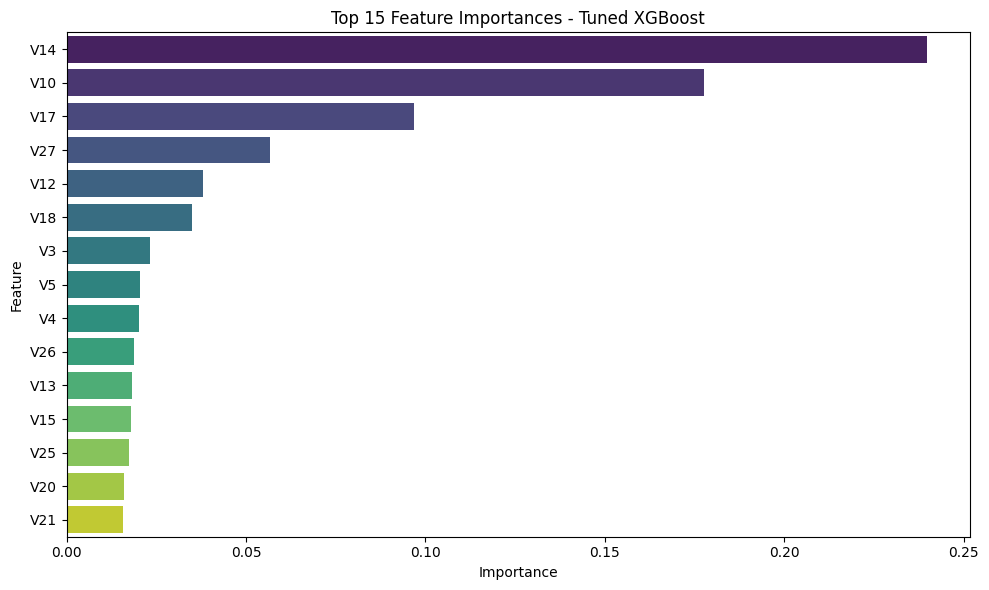

In [39]:
import pandas as pd
import seaborn as sns

# Plot feature importance
importances = tuned_xgb.feature_importances_
features = X.columns

# Create DataFrame
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances - Tuned XGBoost')
plt.tight_layout()
plt.show()


# SHAP Analysis

SHAP (SHapley Additive exPlanations) is perfect for understanding how each feature impacts a specific prediction or the overall model behavior

In [40]:
pip install shap


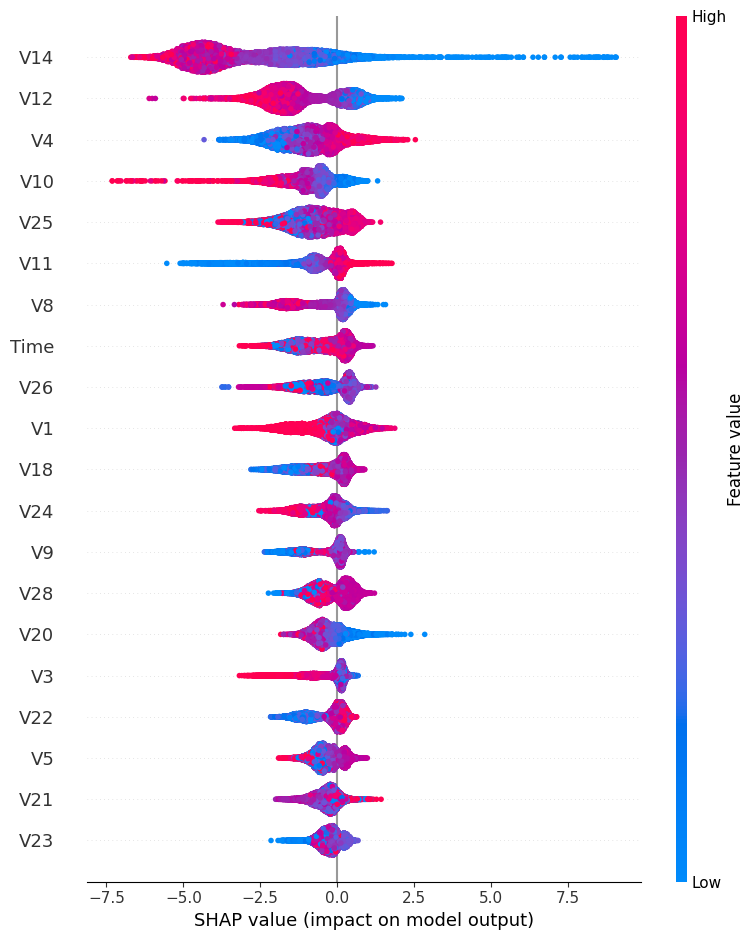

In [41]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming your model is `xgb_model` and your data is `X_test`
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test)


# **Key Observations**

* **V14 :**	Highest impact on the model. High values of V14 reduce the model output (move to left).
* **V12**	High values of V12 also lead to lower predictions, potentially identifying fraud-like behavior.
* **V4, V10, V25** Significant contributors too. You can explore how they affect decisions via dependence plots.
* Time	Has some role, but smaller compared to others.
* **V26, V1, V18**	Mild contribution but still notable in specific instances.

In [46]:
import shap
shap.initjs()

# Use your trained model and test set
explainer = shap.Explainer(xgb_model, df_scaled)
shap_values = explainer(df_scaled)

# Visualize SHAP force plot for the i-th instance
i = 0
shap.force_plot(explainer.expected_value, shap_values[i].values, df_scaled.iloc[i])


100%|===================| 130790/130801 [10:36<00:00]       

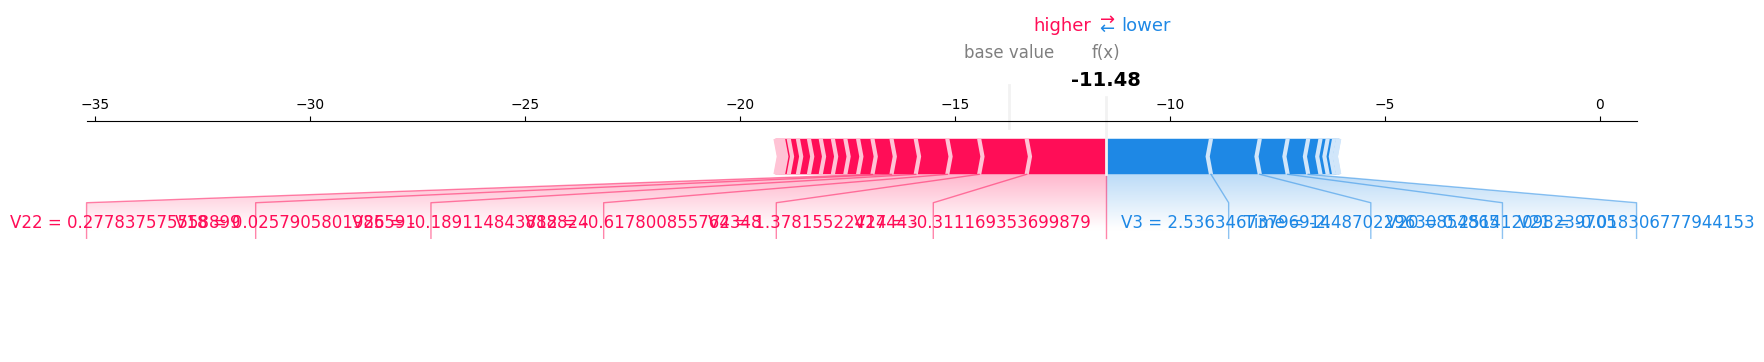

In [47]:
shap.force_plot(explainer.expected_value, shap_values[i].values, df_scaled.iloc[i], matplotlib=True)


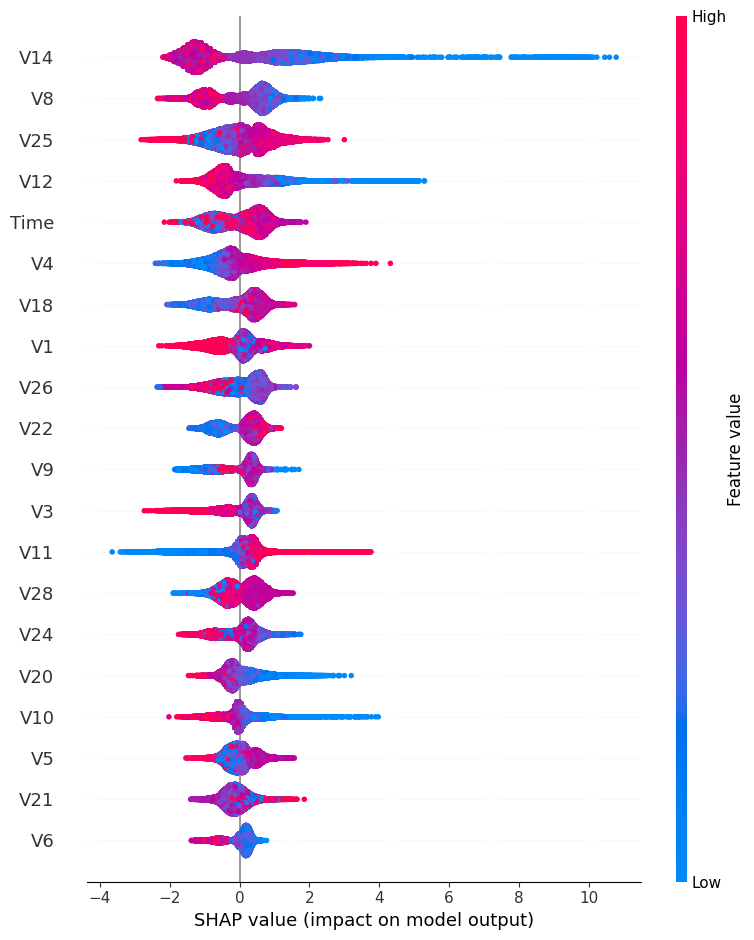

In [49]:
shap.summary_plot(shap_values[:, :-1], X)

#SHAP Force Plot Insights:
This SHAP force plot visualizes the contribution of each feature towards the model's prediction.

* Prediction Output (f(x)): -11.48

This is the model’s raw output (e.g., log-odds if it’s a classification model).

* Base Value: Also -11.48

Since the positive and negative feature contributions balance each other out, the final prediction remains equal to the base value.

* Top Positive Contributors (pushing the prediction higher):

V22 = 0.278: Strongly pushed the prediction higher.

V5 = 0.026, V10 = 1.891, V14 = 0.311: Also contributed positively, though to a lesser extent.

* Top Negative Contributors (pushing the prediction lower):

V3 = 2.536: Most influential feature in decreasing the prediction.

V17 = 0.769, V18 = 1.487: Had notable negative impacts.

* Interpretation:
The model found that certain variables like V22 and V5 supported a higher prediction, but V3 and V17 had stronger opposing effects, ultimately driving the prediction down to the same level as the base value.

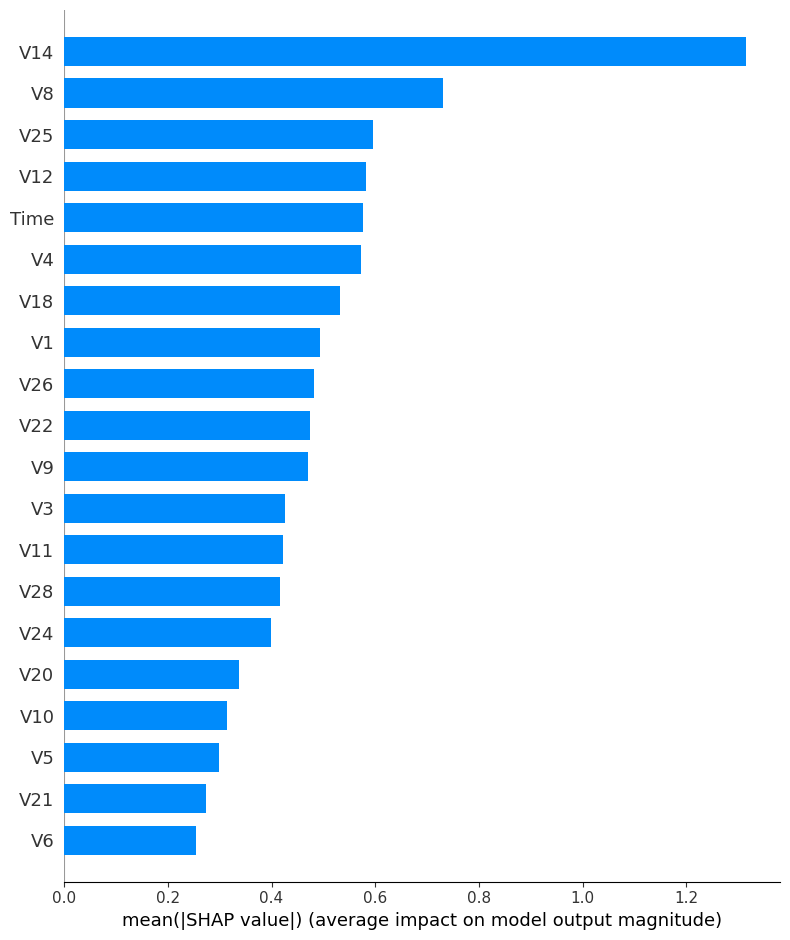

In [53]:
shap.summary_plot(shap_values[:, :-1], X, plot_type='bar')


# Insights from SHAP Summary Plot

**Most Influential Features:**

* V14 is by far the most important feature for predicting fraudulent transactions. It has the highest average SHAP value, meaning it contributes the most (positively or negatively) to the model's output.

* V8, V25, and V12 are also strong contributors, though not as dominant as V14.

**Moderately Important Features:**

* Time, V4, and V18 have a noticeable influence and may represent temporal patterns or transaction behavior.

* V1, V26, and V22 also play consistent roles in model decisions.

**Lower but Non-Negligible Impact:**

* Features like V3, V11, V24, and V28 still contribute meaningfully, but with smaller magnitudes.

* These may represent secondary patterns that complement stronger features.

**Least Contributing Features (in this plot):**

* V6, V21, and V5 have the lowest mean SHAP values, suggesting they may not be strong indicators on their own.



In [56]:
predictions = tuned_xgb.predict(X_test)


In [57]:
pd.DataFrame(predictions).to_csv('submission.csv', index=False)


Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26109
         1.0       1.00      0.79      0.88        52

    accuracy                           1.00     26161
   macro avg       1.00      0.89      0.94     26161
weighted avg       1.00      1.00      1.00     26161



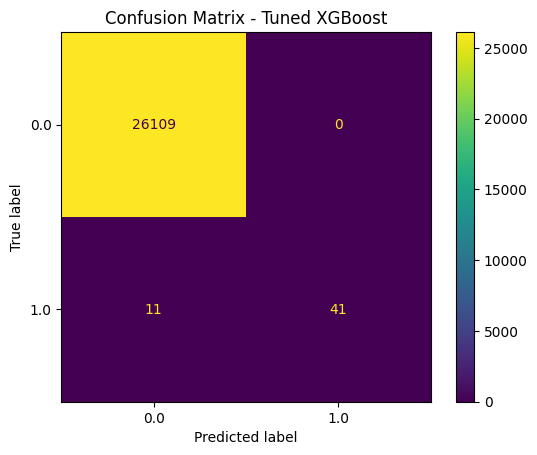

ROC AUC Score: 0.9587


In [58]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

# Predictions already done
print("Classification Report:\n")
print(classification_report(y_test, predictions))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.title("Confusion Matrix - Tuned XGBoost")
plt.show()

# ROC AUC Score (if binary classification and probabilities available)
if len(np.unique(y_test)) == 2:
    probs = tuned_xgb.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, probs)
    print(f"ROC AUC Score: {auc:.4f}")
